In [55]:
#data analysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#models
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.naive_bayes import GaussianNB

In [56]:
dataset = pd.read_csv("Dataset.csv")
dataset['Class'].replace(['Benign', 'Malicious'],
                        [0, 1], inplace=True)
X = dataset.iloc[:, 1: -1]
y =  dataset.iloc[:, -1]

In [57]:
# Splitting the dataset into the Training set and Test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# K-Nearest Neighbors (K-NN)

In [58]:
K_nearest_classifier = KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2)
K_nearest_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
# Prediciting 
y_pred = K_nearest_classifier.predict(X_test)

neigh = KNeighborsClassifier(n_neighbors =10000).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=10000 is",metrics.accuracy_score(y_test, Pred_y))

In [67]:
#Train Model and Predict
k = int((len(X_train)*40)/100)
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=70% is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=70% is 0.9381678597364872


Minimum error:- 0.0026973752463948543 at K = 0


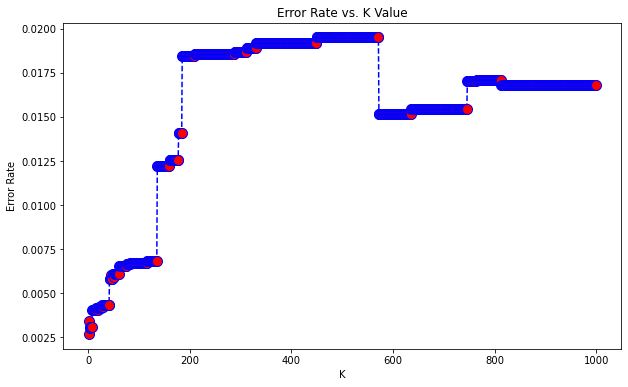

In [61]:
error_rate = []
for i in range(1,1000):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,1000),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9973026247536051 at K = 0


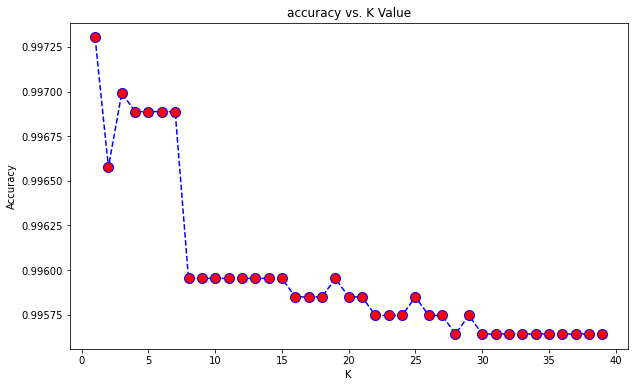

In [62]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

#accuracy rate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
#print(accuracy_score(y_test, y_pred))

In [7]:
# fit the data into Classifier Model 
K_nearest_classifier = KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2)
K_nearest_classifier.fit(X_train, y_train)

# Prediciting 
y_pred = K_nearest_classifier.predict(X_test)

# Evalutaing 
print("Accuracy of model at K= 7  is",accuracy_score(y_test, y_pred))


# Fit the data with a new K 
percent = 60
k = int((len(X_train)*percent)/100)
print(k)
K_nearest_classifier_new = KNeighborsClassifier(n_neighbors= k , metric="minkowski", p=2)
K_nearest_classifier_new

Accuracy of model at K= 7  is 0.9968876439464674
8674


KNeighborsClassifier(n_neighbors=8674)

In [8]:
y_test

2742     1
8412     1
10894    0
168      1
5453     1
        ..
18815    0
7577     1
23070    0
2540     1
21446    0
Name: Class, Length: 9639, dtype: int64

In [9]:
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

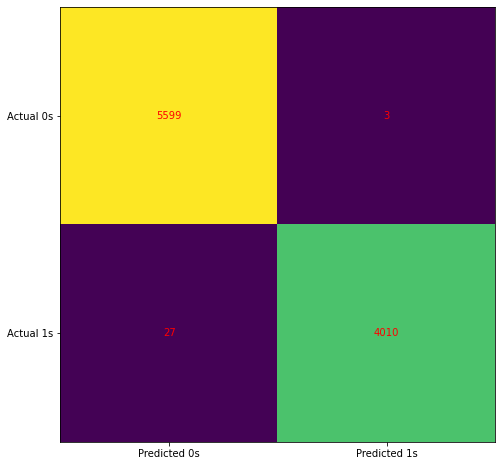

[[5599    3]
 [  27 4010]]


In [11]:
# Making  the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(cm)

In [12]:
# Metrics 
from sklearn.metrics import recall_score

# recall=recall_score(y_test, y_pred)
# print(recall)
KNNR=classification_report(y_test, y_pred)
print(KNNR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5602
           1       1.00      0.99      1.00      4037

    accuracy                           1.00      9639
   macro avg       1.00      1.00      1.00      9639
weighted avg       1.00      1.00      1.00      9639



In [13]:
from sklearn.metrics import precision_score

recall=precision_score(y_test, y_pred)
print(recall)

0.9992524296037877


pip install pydotplus

# Naive Bayes

In [46]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [47]:
# Prediciting 
y_pred = classifier.predict(X_test)

In [48]:
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

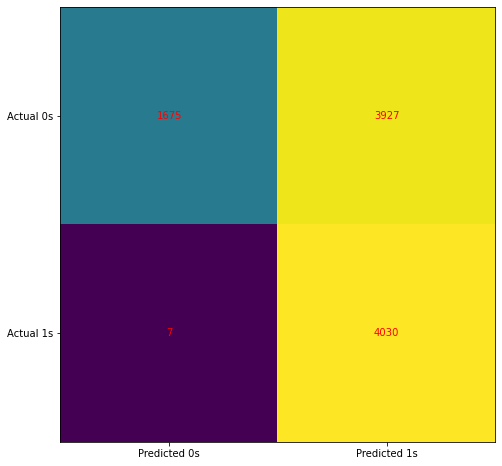

In [49]:
# Making  the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(accuracy_score(y_test, y_pred))

0.5918663761801016


In [51]:
NBR=classification_report(y_test, y_pred)
print(NBR)

              precision    recall  f1-score   support

           0       1.00      0.30      0.46      5602
           1       0.51      1.00      0.67      4037

    accuracy                           0.59      9639
   macro avg       0.75      0.65      0.57      9639
weighted avg       0.79      0.59      0.55      9639



Benign

In [ ]:
NaiveBayes = [0.80,1.00,0.89]
KNN = [1.00,1.00,1.00]
index = ['precision', 'recall', 'f1-score']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN}, index=index)
ax = df.plot.bar(rot=0)

Malicious

NaiveBayes = [ 1.00, 0.65, 0.79 ]
KNN = [ 1.00, 0.99, 1.00]
index = ['precision', 'recall', 'f1-score']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN}, index=index)
ax = df.plot.bar(rot=0)

NaiveBayes = [0.853585657370518]
KNN = [0.9971779548472776]
index = ['accuracy']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN}, index=index)
ax = df.plot.bar(rot=0)

# Decision Tree

In [15]:
import sklearn
print("scikit-learn version: ", sklearn.__version__)

scikit-learn version:  1.1.2


In [16]:
import sklearn.tree

model1 = sklearn.tree.DecisionTreeClassifier()
model1 = model1.fit(X_train, y_train)   # naming the decision tree 'model1', for lack of a better name
model1

DecisionTreeClassifier()

!pip3 install graphviz

import sys
!{sys.executable} -m pip install graphviz

In [ ]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin\dot'

In [17]:
import graphviz

In [19]:
pd.DataFrame(X)

,Contains Percentage,Contains Plus,Contains HTTP,Contains JS,Contains Open Parenthesis,Contains Close Parenthesis,Contains Hyphen,Contains Less Than,Contains Greater Than,Contains Underscore,Contains Colon,Contains Open Brace,Contains Close Brace,Contains Spase,Contains Qutions,Contains Duble Slash,Contains Alert,Contains Break Line
0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1
1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1
2,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1
3,1,0,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,1
4,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24091,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
24092,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
24093,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
24094,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0


In [20]:
print(X.columns)
print(y.unique())

Index(['Contains Percentage', 'Contains Plus', 'Contains HTTP', 'Contains JS',
       'Contains Open Parenthesis', 'Contains Close Parenthesis',
       'Contains Hyphen', 'Contains Less Than', 'Contains Greater Than',
       'Contains Underscore', 'Contains Colon', 'Contains Open Brace',
       'Contains Close Brace', 'Contains Spase', 'Contains Qutions',
       'Contains Duble Slash', 'Contains Alert', 'Contains Break Line'],
      dtype='object')
[1 0]


In [26]:
y

0        1
1        1
2        1
3        1
4        1
        ..
24091    0
24092    0
24093    0
24094    0
24095    0
Name: Class, Length: 24096, dtype: int64

In [24]:
dataset['Class'].replace([0,1],
                        ['Benign', 'Malicious'], inplace=True)

In [25]:
y

0        1
1        1
2        1
3        1
4        1
        ..
24091    0
24092    0
24093    0
24094    0
24095    0
Name: Class, Length: 24096, dtype: int64

In [28]:
dot_data = sklearn.tree.export_graphviz(model1, out_file=None,
                         feature_names=X.columns,  
                         class_names=y.unique(),  
                         filled=True, rounded=True,  
                         special_characters=True)

TypeError: can only concatenate str (not "numpy.int64") to str

In [ ]:
graph = graphviz.Source(dot_data)  
graph

In [29]:
y_pred = model1.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

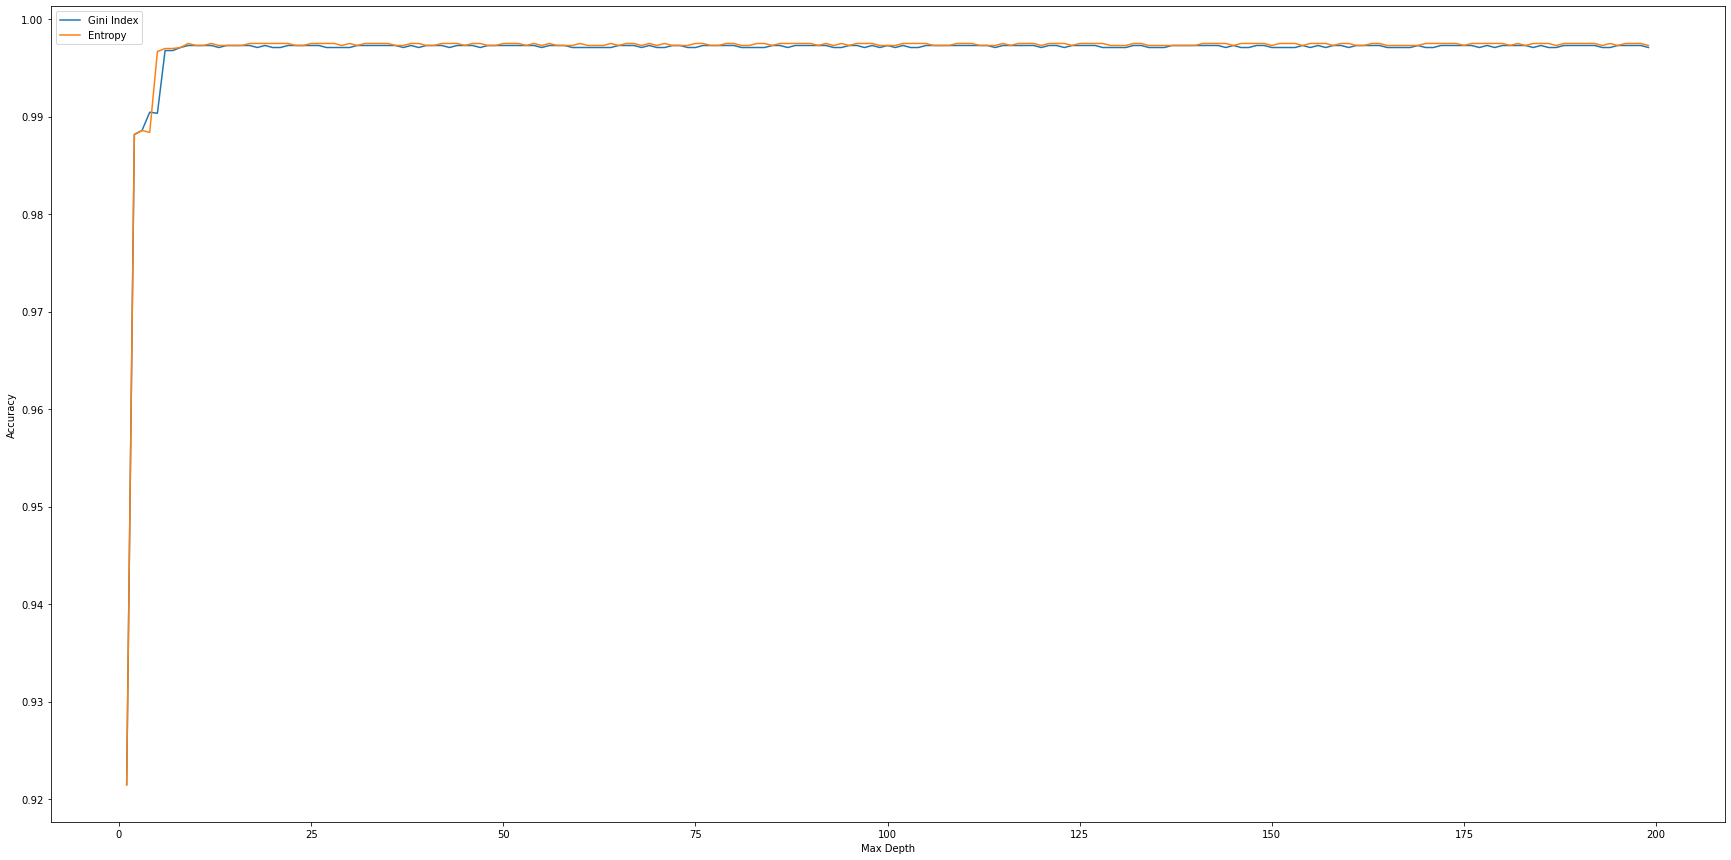

In [63]:
maxd, gini, entropy = [], [], []
for i in range(1,200):
    ###
    dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    gini.append(accuracy_score(y_test, pred))
    
    ####
    dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    entropy.append(accuracy_score(y_test, pred))
    
    ####
    maxd.append(i)
    
####
d = pd.DataFrame({'gini':pd.Series(gini), 'entropy':pd.Series(entropy), 'max_depth':pd.Series(maxd)})
# visualizing changes in parameters
plt.plot('max_depth','gini', data=d, label='Gini Index')
plt.plot('max_depth','entropy', data=d, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

In [31]:
print("Training accuracy rate:", model1.score(X_train, y_train))
print("Generalized testing accuracy rate:", model1.score(X_test, y_test))
model1.score(X_test, y_test)

Training accuracy rate: 0.99840907518849
Generalized testing accuracy rate: 0.9973026247536051


0.9973026247536051

In [32]:
print(model1.feature_importances_)
print(model1.tree_.node_count)

[9.75129865e-05 5.83076209e-04 0.00000000e+00 4.48375847e-03
 1.10496406e-04 6.65139978e-08 2.81282224e-04 2.58563609e-01
 0.00000000e+00 5.18880200e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.99614047e-03 1.14462580e-03 2.32615648e-02
 7.08743548e-01 2.15438839e-04]
59


In [33]:
DT=classification_report(y_test, y_pred)
print(DT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5602
           1       1.00      0.99      1.00      4037

    accuracy                           1.00      9639
   macro avg       1.00      1.00      1.00      9639
weighted avg       1.00      1.00      1.00      9639



# Random Forest Classifier 

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [35]:
# Prediciting 
y_pred = classifier.predict(X_test)

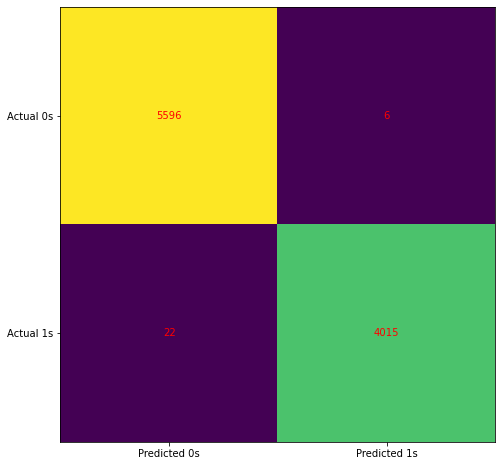

In [36]:
# Making  the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [37]:
# Metrics 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5602
           1       1.00      0.99      1.00      4037

    accuracy                           1.00      9639
   macro avg       1.00      1.00      1.00      9639
weighted avg       1.00      1.00      1.00      9639



# Support Vector Machines

In [38]:

from sklearn.svm import SVC
model = SVC(kernel='linear')

In [39]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
predictions = model.predict(X_test)
print(predictions)

[1 1 0 ... 0 1 0]


In [41]:
percentage = model.score(X_test, y_test)

In [42]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[5597    5]
 [  30 4007]]
Test Set: 9639
Accuracy = 99.63689179375453 %


In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5602
           1       1.00      0.99      1.00      4037

    accuracy                           1.00      9639
   macro avg       1.00      1.00      1.00      9639
weighted avg       1.00      1.00      1.00      9639



# Bar Graphs 

Benign

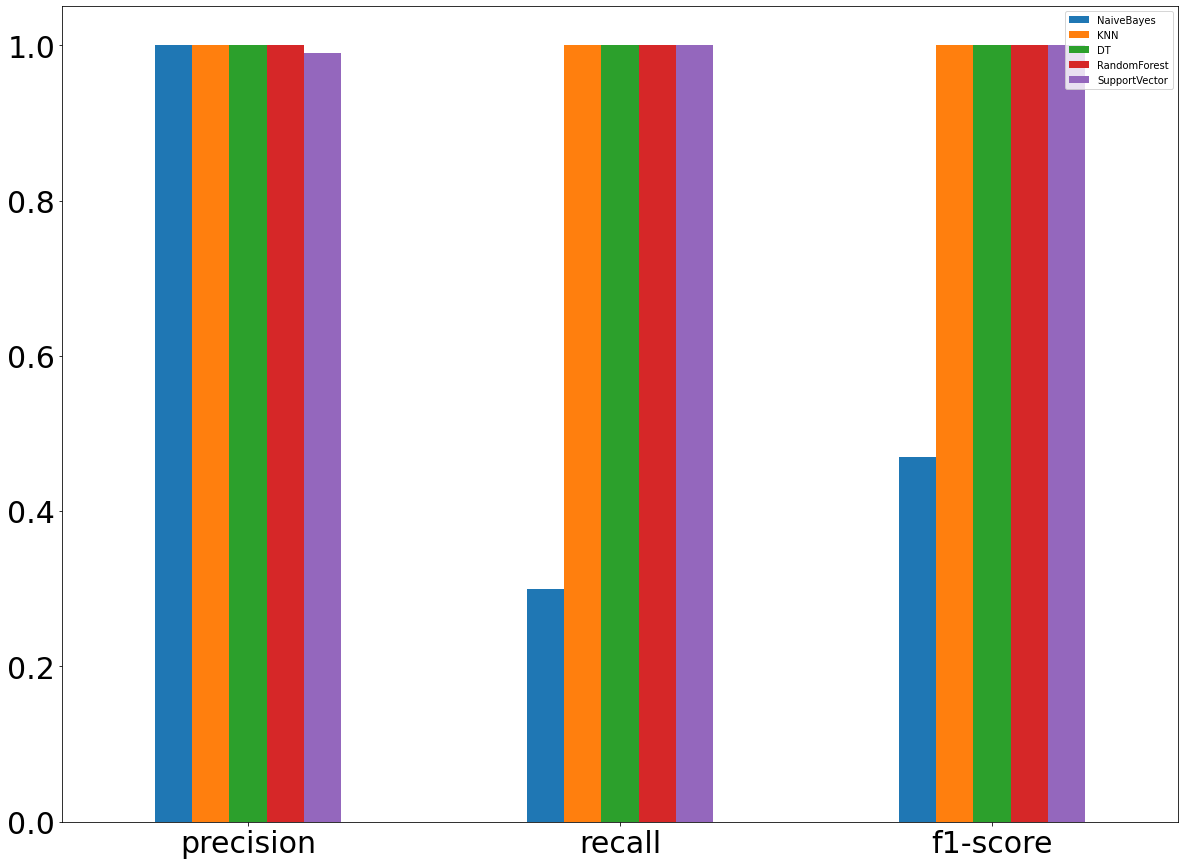

In [54]:
NaiveBayes = [1.00, 0.30,0.47]
KNN = [1.00,1.00,1.00]
DT=[1.00,1.00,1.00]
RandomForest=[ 1.00,1.00,1.00]
SupportVector=[ 0.99,1.00,1.00]
index = ['precision','recall', 'f1-score']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN,
                   'DT':DT,
                   'RandomForest':RandomForest,
                   'SupportVector':SupportVector},index=index)
ax = df.plot.bar(rot=0,fontsize = 30)
plt.rcParams["figure.figsize"] = (30, 15)

Malicious

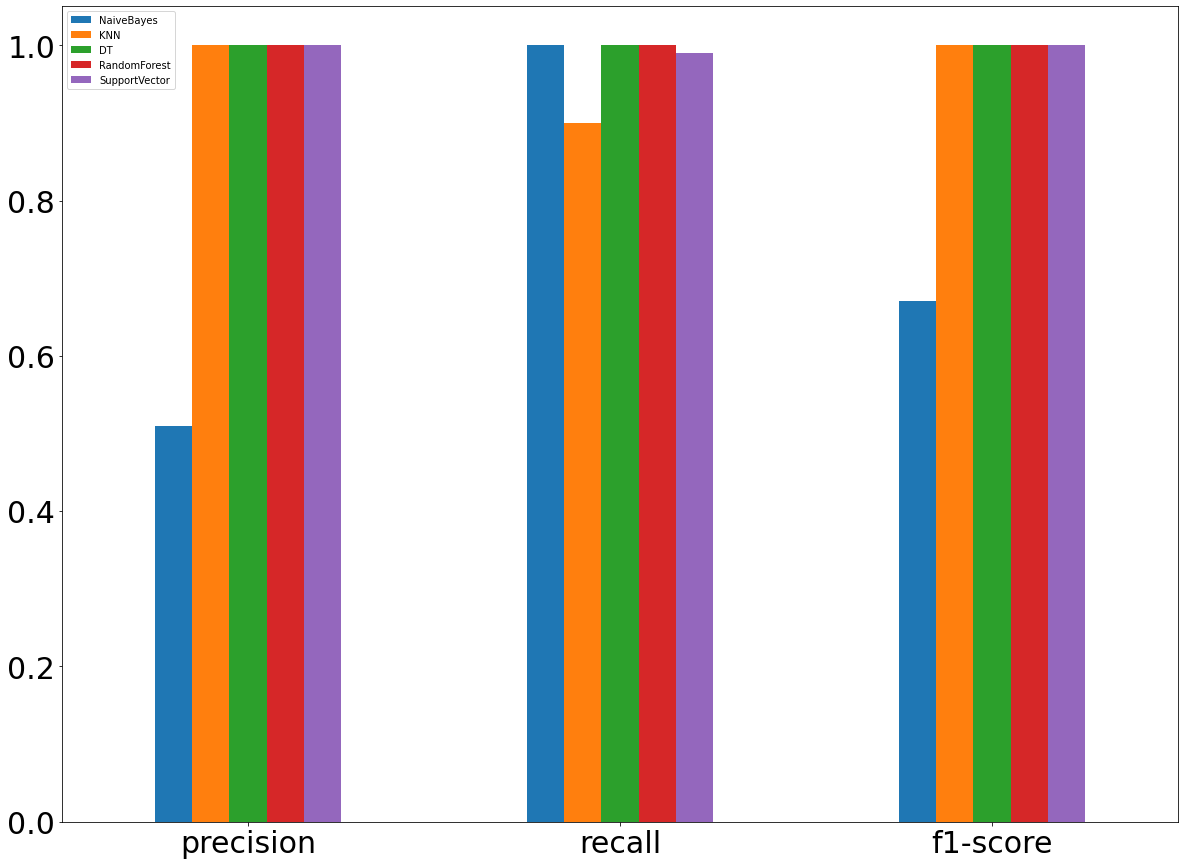

In [53]:
NaiveBayes = [0.51,1.00,0.67]
KNN = [1.00,0.90,1.00]
DT=[1.00,1.00,1.00]
RandomForest=[ 1.00,1.00,1.00]
SupportVector=[1.00,0.99,1.00]
index = ['precision', 'recall', 'f1-score']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN,
                   'DT':DT,
                   'RandomForest':RandomForest,
                   'SupportVector':SupportVector},index=index)
ax = df.plot.bar(rot=0,fontsize = 30)
plt.rcParams["figure.figsize"] = (20, 15)

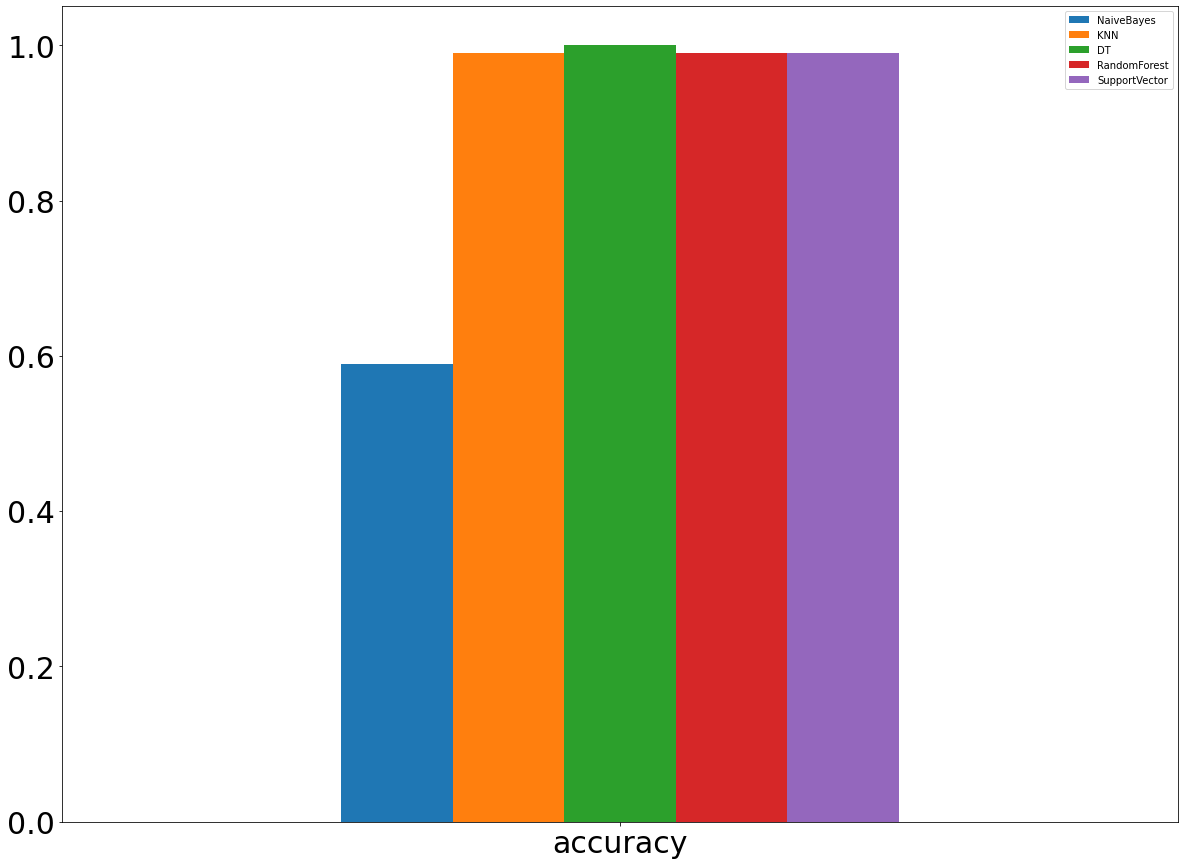

In [52]:
NaiveBayes = [0.59]
KNN = [0.99]
DT=[1.00]
RandomForest=[0.99]
SupportVector=[0.99]
index = ['accuracy']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN,
                   'DT':DT,
                   'RandomForest':RandomForest,
                   'SupportVector':SupportVector},index=index)
ax = df.plot.bar(rot=0,fontsize = 30)
plt.rcParams["figure.figsize"] = (20, 15)